In [9]:
import numpy as np
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
import pandas as pd

In [7]:
session = np.load('/data/LLMs/willet/session.npy')
ba_44_neural_data = np.load('/data/LLMs/willet/smooth_ba44_pow.npy')
ba_6v_neural_data = np.load('/data/LLMs/willet/smooth_ba6v_pow.npy')

In [36]:
r2_scores = []
label = []

for sess in np.unique(session):
    session_idxs = np.argwhere(session==sess).squeeze()
    
    y_test = ba_6v_neural_data[session_idxs]
    
    y_pred_44_6v = np.load(f'/data/LLMs/willet/regression_results/notest_44_6v_pow/y_pred_{sess}.npy')
    y_pred_dg_6v = np.load(f'/data/LLMs/willet/regression_results/delay_go_pow/y_pred_{sess}.npy')
    
    r2_scores.append(r2_score(y_test, y_pred_44_6v))
    label.append('Delay-Go_BA6V')
    r2_scores.append(r2_score(y_test, y_pred_dg_6v))
    label.append('BA44_BA6v')

In [37]:
simple_perf_comp = pd.DataFrame({'R2': r2_scores, 'Region': label})

In [39]:
sns.histplot(simple_perf_comp, hue='Region', y='R2')
plt.xlabel("R2", fontsize=16)
plt.ylabel("Number of sessions", fontsize=16)
#plt.savefig("/home2/ebrahim/neural_seq_decoder/figures/r2_44_6v_insample", dpi=300, bbox_inches='tight')
plt.show()

ValueError: Could not interpret value `R2` for `y`. An entry with this name does not appear in `data`.

In [12]:
r2_score_44_6v = []
r2_score_6v_6v = []
r2_score_44_44 = []

for sess in np.unique(session):
    session_idxs = np.argwhere(session==sess).squeeze()
    
    y_test_44_6v = ba_6v_neural_data[session_idxs]
    y_test_6v_6v = ba_6v_neural_data[session_idxs][:, 1::2]
    y_test_44_44 = ba_44_neural_data[session_idxs][:, 1::2]
    
    y_pred_44_6v = np.load(f'/data/LLMs/willet/regression_results/notest_44_6v_pow/y_pred_{sess}.npy')
    y_pred_6v_6v = np.load(f'/data/LLMs/willet/regression_results/notest_6v_6v_pow/y_pred_{sess}.npy')
    y_pred_44_44 = np.load(f'/data/LLMs/willet/regression_results/notest_44_44_pow/y_pred_{sess}.npy')
    
    r2_score_44_6v.append(r2_score(y_test_44_6v, y_pred_44_6v))
    r2_score_6v_6v.append(r2_score(y_test_6v_6v, y_pred_6v_6v))
    r2_score_44_44.append(r2_score(y_test_44_44, y_pred_44_44))

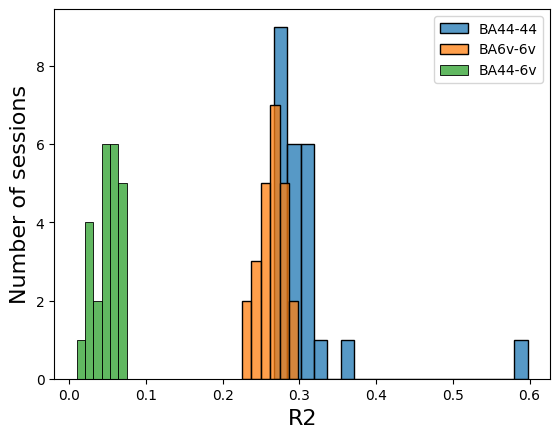

In [17]:
sns.histplot(r2_score_44_44, label='BA44-44')
sns.histplot(r2_score_6v_6v, label='BA6v-6v')
sns.histplot(r2_score_44_6v, label='BA44-6v')
plt.legend()
plt.xlabel("R2", fontsize=16)
plt.ylabel("Number of sessions", fontsize=16)
plt.savefig("/home2/ebrahim/neural_seq_decoder/figures/r2_44_6v_insample", dpi=300, bbox_inches='tight')
plt.show()

In [19]:
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
import numpy as np

N = 12

# Initialize dictionaries to store R² scores for each dimension
r2_scores_44_6v = {dim: [] for dim in range(1, N)}
r2_scores_6v_6v = {dim: [] for dim in range(1, N)}
r2_scores_44_44 = {dim: [] for dim in range(1, N)}

for sess in np.unique(session):
    session_idxs = np.argwhere(session == sess).squeeze()
    
    y_test_44_6v = ba_6v_neural_data[session_idxs]
    y_test_6v_6v = ba_6v_neural_data[session_idxs][:, 1::2]
    y_test_44_44 = ba_44_neural_data[session_idxs][:, 1::2]
    
    y_pred_44_6v = np.load(f'/data/LLMs/willet/regression_results/notest_44_6v_pow/y_pred_{sess}.npy')
    y_pred_6v_6v = np.load(f'/data/LLMs/willet/regression_results/notest_6v_6v_pow/y_pred_{sess}.npy')
    y_pred_44_44 = np.load(f'/data/LLMs/willet/regression_results/notest_44_44_pow/y_pred_{sess}.npy')
    
    # Loop over dimensions from 1 to N
    for dim in range(1, N):
        # Perform PCA on predictions with 'dim' components
        pca_44_6v = PCA(n_components=dim)
        pca_6v_6v = PCA(n_components=dim)
        pca_44_44 = PCA(n_components=dim)
        
        y_pred_44_6v_pca = pca_44_6v.fit_transform(y_pred_44_6v)
        y_pred_6v_6v_pca = pca_6v_6v.fit_transform(y_pred_6v_6v)
        y_pred_44_44_pca = pca_44_44.fit_transform(y_pred_44_44)
        
        # Project back to original dimensions
        y_pred_44_6v_back = pca_44_6v.inverse_transform(y_pred_44_6v_pca)
        y_pred_6v_6v_back = pca_6v_6v.inverse_transform(y_pred_6v_6v_pca)
        y_pred_44_44_back = pca_44_44.inverse_transform(y_pred_44_44_pca)
        
        # Calculate R² scores and store them in the corresponding lists
        r2_scores_44_6v[dim].append(r2_score(y_test_44_6v, y_pred_44_6v_back))
        r2_scores_6v_6v[dim].append(r2_score(y_test_6v_6v, y_pred_6v_6v_back))
        r2_scores_44_44[dim].append(r2_score(y_test_44_44, y_pred_44_44_back))

In [23]:
r2_scores = []
dim = []
source_area = []
for key, value in r2_scores_44_6v.items():
    r2_scores.extend(value)
    dim.extend([key for i in range(len(value))])
    source_area.extend(['BA44-6v' for i in range(len(value))])
    
for key, value in r2_scores_6v_6v.items():
    r2_scores.extend(value)
    dim.extend([key for i in range(len(value))])
    source_area.extend(['BA6v-6v' for i in range(len(value))])
    
for key, value in r2_scores_44_44.items():
    r2_scores.extend(value)
    dim.extend([key for i in range(len(value))])
    source_area.extend(['BA44-44' for i in range(len(value))])

In [29]:
reduced_rank_pd = pd.DataFrame({'R2': r2_scores, 'Reduced rank dim': dim, 'Regions': source_area})

Text(0.5, 0, 'Reduced rank dim')

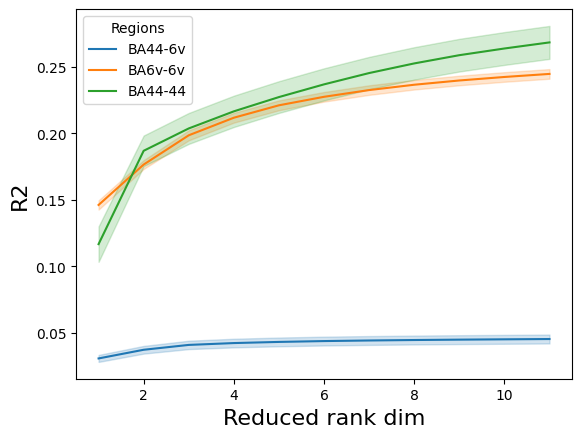

In [32]:
sns.lineplot(data=reduced_rank_pd, y='R2', x='Reduced rank dim', hue='Regions', errorbar='se')
plt.ylabel("R2", fontsize=16)
plt.xlabel("Reduced rank dim", fontsize=16)
